In [1]:
import seml
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seml/database.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
results = seml.get_results('tranvae', to_data_frame=True)

  0%|          | 0/144 [00:00<?, ?it/s]

  0%|          | 0/144 [00:00<?, ?it/s]

/home/icb/carlo.dedonno/anaconda3/envs/lataq/lib/python3.8/site-packages/seml/evaluation.py:80: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  parsed = pd.io.json.json_normalize(parsed, sep='.')


In [3]:
results

,_id,config.overwrite,config.db_collection,config.alpha_epoch_anneal,config.clustering_res,config.data,config.eta,config.hidden_layers,config.latent_dim,config.loss_metric,...,result.cell_type.report.Pre-endocrine.f1-score,result.cell_type.report.Pre-endocrine.support,result.cell_type.report.Tip.precision,result.cell_type.report.Tip.recall,result.cell_type.report.Tip.f1-score,result.cell_type.report.Tip.support,result.cell_type.report.Trunk.precision,result.cell_type.report.Trunk.recall,result.cell_type.report.Trunk.f1-score,result.cell_type.report.Trunk.support
0,1,1,tranvae,1000.0,1.061810,pancreas,375.165579,2.498160,24.981605,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,tranvae,1000.0,1.926071,pancreas,950.763592,4.802857,48.028572,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,tranvae,10000.0,1.597991,pancreas,732.261948,3.927976,39.279758,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,tranvae,100.0,1.397988,pancreas,599.059826,3.394634,33.946339,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,tranvae,10000.0,0.734028,pancreas,156.862622,1.624075,16.240746,dist,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,192,192,tranvae,1000000.0,1.242765,scvelo,495.681733,2.980708,29.807076,dist,...,0.768100,2058.0,0.408183,0.967404,0.574123,6105.0,0.769668,0.958107,0.853611,1838.0
140,193,193,tranvae,10000.0,0.551583,scvelo,35.354133,1.137554,11.375541,dist,...,0.815582,2058.0,0.893097,0.826536,0.858528,6105.0,0.651959,0.787813,0.713476,1838.0
141,194,194,tranvae,10000.0,1.863981,scvelo,909.411082,4.637282,46.372816,dist,...,0.835891,2058.0,0.894993,0.901884,0.898425,6105.0,0.776927,0.937976,0.849889,1838.0
142,197,197,tranvae,1000.0,0.967567,scvelo,312.399365,2.246844,22.468443,dist,...,0.755440,2058.0,0.789488,0.932514,0.855062,6105.0,0.522556,0.983134,0.682402,1838.0


In [4]:
results = results[
    results.columns[results.columns.str.contains('config')].tolist() +
    ['result.cell_type.report.weighted avg.f1-score']
]

In [5]:
results.head(2)

,config.overwrite,config.db_collection,config.alpha_epoch_anneal,config.clustering_res,config.data,config.eta,config.hidden_layers,config.latent_dim,config.loss_metric,config.n_epochs,config.n_pre_epochs,config.seed,result.cell_type.report.weighted avg.f1-score
0,1,tranvae,1000.0,1.061810,pancreas,375.165579,2.498160,24.981605,dist,100,80,682873870,0.993696
1,2,tranvae,1000.0,1.926071,pancreas,950.763592,4.802857,48.028572,dist,100,80,444187412,0.978201


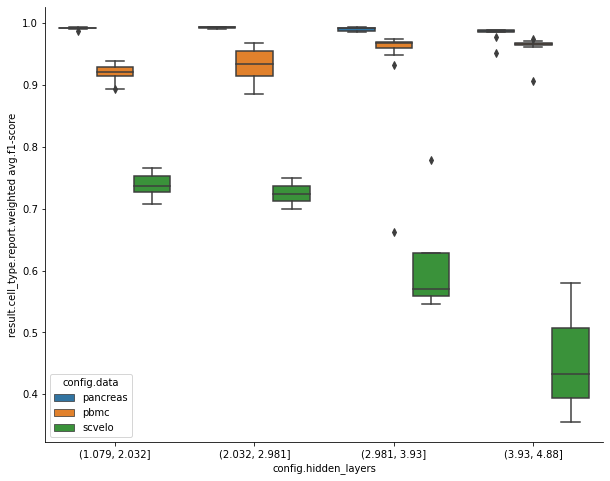

In [38]:
plt.rcParams['figure.figsize'] = (10, 8)
sns.boxplot(
    x=pd.cut(results['config.hidden_layers'], bins=4), 
    y=results['result.cell_type.report.weighted avg.f1-score'],
    hue=results['config.data']
)
sns.despine()

In [40]:
results.groupby(['config.eta']).size()

config.eta
21.563910     3
35.354133     2
47.403962     2
59.025529     3
65.986541     2
98.574442     2
122.916197    2
140.354367    2
156.838526    3
156.862622    3
171.353600    2
182.643142    3
184.221105    3
185.669601    2
200.474108    2
213.126772    3
259.521202    2
291.937911    2
292.852504    2
304.938001    3
305.309155    2
312.399365    2
366.995481    2
375.165579    3
432.513074    2
440.712341    2
456.613914    2
495.681733    2
514.720204    2
520.547953    2
525.231675    2
547.163569    2
592.822154    2
599.059826    3
601.513897    3
607.937307    2
612.241042    2
662.859762    2
684.548793    2
708.364505    3
732.261948    3
785.390785    2
808.588951    2
832.610198    2
866.309970    3
909.411082    2
948.936652    2
950.763592    3
965.666401    2
969.939942    2
dtype: int64